In [1]:
import os
import yt
import matplotlib.pyplot as plt
from src.load_model import LoadAthenaPKRun

# Usage example
run = 'turb_nGPU1_nc256_M##_B0.05'
sim = LoadAthenaPKRun(os.path.join('outputs', run))
sim.snapshot_list

['parthenon.prim.00047.phdf',
 'parthenon.prim.00048.phdf',
 'parthenon.prim.00049.phdf',
 'parthenon.prim.final.phdf']


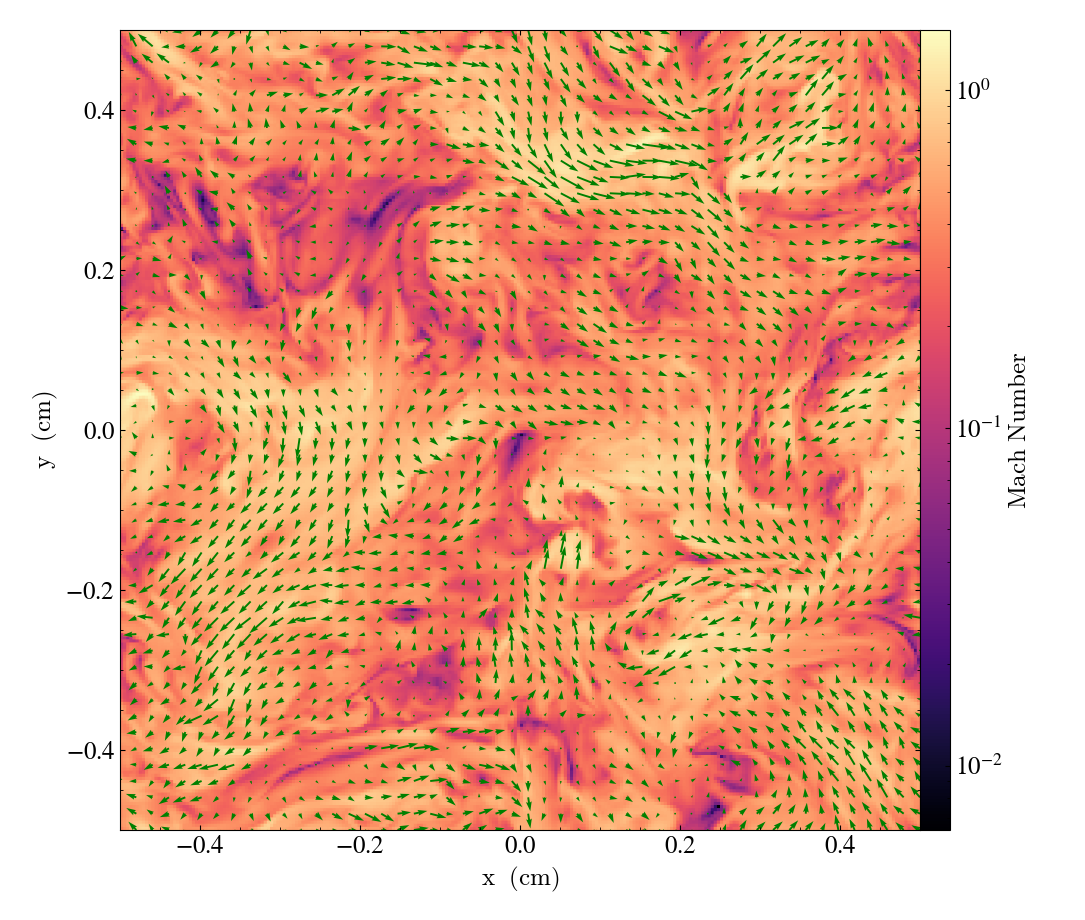

In [4]:
snapshot_number_str = str(49).zfill(5)

try:
    ds = yt.load(os.path.join(sim.folder_path, f'parthenon.prim.{snapshot_number_str}.phdf'))

    _plot = yt.SlicePlot(ds, 'z', ('gas', 'mach_number'))
    _plot.set_cmap(field=('gas', 'mach_number'), cmap='magma')

except FileNotFoundError:
    raise FileNotFoundError('Snapshot not found in the current simulation directory.')

_plot.annotate_quiver(
    ('gas', 'velocity_x'),
    ('gas', 'velocity_y'),
    color='green',
    factor=16
)

_plot.show()
# p = sim.plot_snapshot_field_slice(49, ('gas', 'mach_number'), cmap='magma')

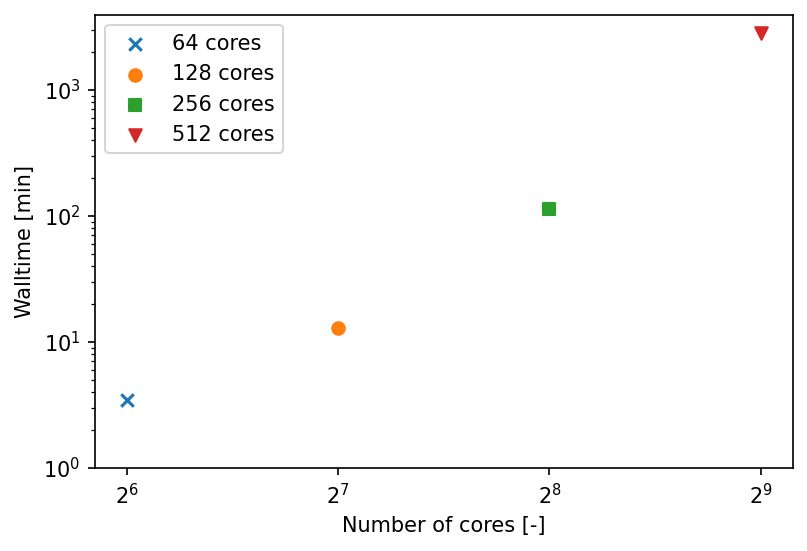

In [ ]:
nc = [64, 128, 256, 512]
walltime = [2.06e+02, 7.67e+02, 6.77e+03, 1.69e+05]

fig, ax = plt.subplots(dpi=150)
for i,m in enumerate(['x', 'o', 's', 'v']):
    ax.scatter(nc[i], walltime[i] / 60, label=f'{64 * 2**i} cores', marker=m)

ax.set_xlabel(r'Number of cores [-]')
ax.set_ylabel(r'Walltime [min]')
ax.set_xscale('log', base=2)
ax.set_yscale('log')
ax.set_ylim(1e0, None)
plt.legend()